# Anaylisis of the results

The analysis of the results from the topic modeling and subsequent refinements provides valuable insights into the themes related to uncertainty, particularly in the context of central bank policy.


In [1]:
from nbcpu.topic import TopicAnalysis

metadata_file = "/home/yjlee/workspace/projects/nbcpu/workspace/datasets/processed/khmer_tokenized/train.parquet"
uncertainty_file = "/home/yjlee/workspace/projects/nbcpu/workspace/nbcpu-topic_uncertainty/model/outputs/LDA_model(4)_k(20)-doc_topic_dists.parquet"
topic_file = "/home/yjlee/workspace/projects/nbcpu/workspace/nbcpu-topic_prior/model/outputs/LDA_model(1)_k(20)-doc_topic_dists.parquet"

meta_columns = {
    "id": "id",
    "text": "text",
    "time": "timestamp",
    "title": "title",
}
ta = TopicAnalysis(
    name="Topic Analysis",
    metadata_file=metadata_file,
    data_files=topic_file,
    meta_columns=meta_columns,
    verbose=True,
)


/home/yjlee/.venvs/nbcpu/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Exploratory Data Analysis (EDA)

The Exploratory Data Analysis (EDA) provides an overview of the dataset used for the topic modeling, focusing on the number of articles and their average length over the years. Here's a detailed analysis of the data:

### Yearly Distribution

The dataset spans from 2014 to 2023, with a total of 39,632 articles. The following observations can be made from the yearly distribution:

- **2014**: The dataset begins with 2,047 articles, having an average length of 3,345 words.
- **2015-2018**: A gradual increase in the number of articles is observed, reaching 3,530 in 2018, with average lengths ranging from 3,162 to 3,486 words.
- **2019-2020**: The number of articles continues to grow, reaching 4,688 in 2020, with average lengths around 3,400 words.
- **2021-2022**: A significant increase is noted, with 5,493 articles in 2021 and 6,866 in 2022, though the average length slightly decreases to around 3,100 words.
- **2023**: The data for 2023 includes 3,750 articles, with an average length of 3,255 words.

### Overall Trends

- **Number of Articles**: The dataset shows a consistent upward trend in the number of articles over the years, reflecting a growing interest in the subjects related to uncertainty, economics, and central bank policy.
- **Average Length**: The average length of the articles remains relatively stable, with minor fluctuations. The overall average length across all years is 3,247 words.


In [2]:
ta.eda_metadata()


INFO:hyfi.utils.datasets.load:Loading data from /home/yjlee/workspace/projects/nbcpu/workspace/datasets/processed/khmer_tokenized/train.parquet
INFO:hyfi.utils.datasets.load: >> elapsed time to load data: 0:00:03.509520


,Year,num_articles,avg_length
0,2014,2047,3345.254030
1,2015,2804,3162.745720
2,2016,3345,3486.932436
3,2017,3183,3174.949419
4,2018,3530,3182.720963
5,2019,3926,3423.020122
6,2020,4688,3365.567193
7,2021,5493,3144.084653
8,2022,6866,3103.058549
9,2023,3750,3255.596800


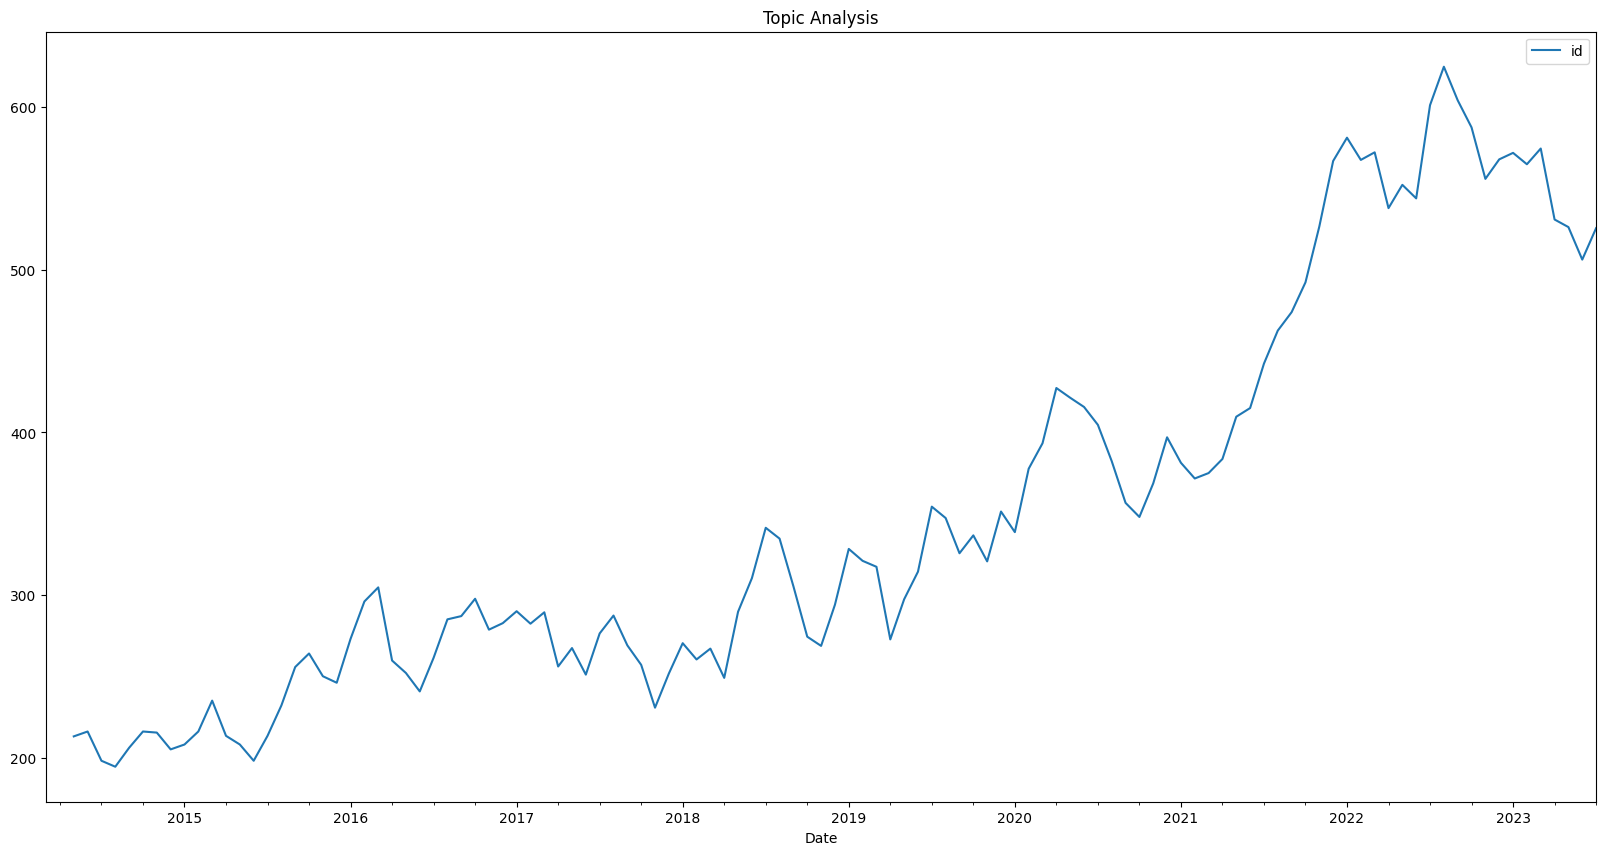

In [3]:
agg = ta.aggregate(ta.id_timestamp, agg_func="count")
ta.plot(agg, plot_type="line")


INFO:hyfi.utils.datasets.load:Loading data from /home/yjlee/workspace/projects/nbcpu/workspace/nbcpu-topic_prior/model/outputs/LDA_model(1)_k(20)-doc_topic_dists.parquet
INFO:hyfi.utils.datasets.load: >> elapsed time to load data: 0:00:00.011518


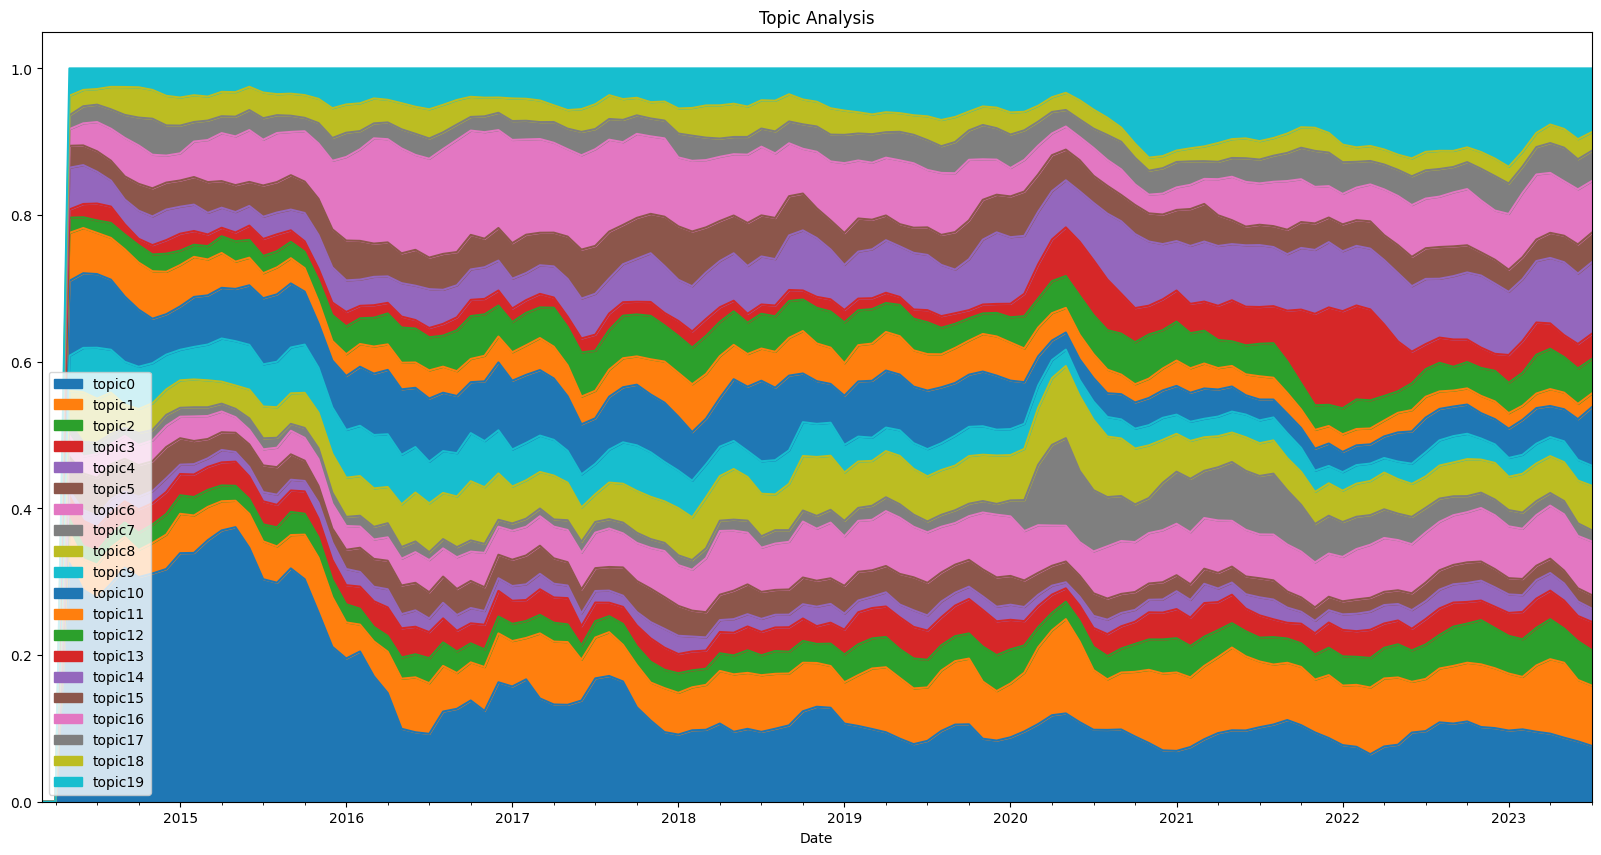

In [4]:
agg = ta.aggregate()
ta.plot(agg, plot_type="area")


In [5]:
topic_columns = {
    "id": "id",
    "topic0": "Economic",
    "topic1": "Banking",
    "topic7": "Asean",
}

ta.save_data(
    ta.data.rename(columns=topic_columns)[topic_columns.values()], "topic_data.parquet"
)

INFO:hyfi.utils.datasets.save:Saving dataframe to /raid/cis/yjlee/workspace/projects/nbcpu/book/supplementary/analysis/workspace/outputs/topic_data.parquet
INFO:hyfi.utils.datasets.save: >> elapsed time to save data: 0:00:00.043843


## Topic Trend Analysis

In the analysis of topic trends, we focus on three key areas: Economic, Banking, and ASEAN-related topics. The dataset spans from 2014 to 2023, and the topic weights represent the prominence of each topic within the corpus for each year. Here's a detailed analysis of the trends:

- **Economic Topic**: The declining trend in the Economic topic may reflect a shift in focus or changes in the global economic landscape. The consistent decrease might indicate a reduced emphasis on general economic indicators.
- **Banking Topic**: The upward trend in the Banking topic, with a notable spike in 2020, suggests an increasing interest in banking and financial services, possibly driven by regulatory changes, technological advancements, or economic events.
- **ASEAN Topic**: The fluctuation in the ASEAN topic, with a significant increase in 2020, may reflect regional developments, cooperation, or challenges within the ASEAN community.


In [20]:
from nbcpu.topic import TopicAnalysis

metadata_file = "/home/yjlee/workspace/projects/nbcpu/workspace/datasets/processed/khmer_tokenized/train.parquet"
topic_file = "/home/yjlee/workspace/projects/nbcpu/book/supplementary/analysis/workspace/outputs/topic_data.parquet"
uncertainty_file = "/home/yjlee/workspace/projects/nbcpu/workspace/nbcpu-topic_uncertainty_filtered/model/outputs/inferred_topics/LDA_model(2)_k(5)-inferred_doc_topic_dists.parquet"

meta_columns = {
    "id": "id",
    "text": "text",
    "time": "timestamp",
    "title": "title",
}
data_columns = {
    "id": "id",
    "Economic": "Economic",
    "Banking": "Banking",
    "Asean": "Asean",
    "topic0": "Uncertainty",
    "topic1": "Recovery",
    "topic2": "Monetary Action",
}
ta = TopicAnalysis(
    name="Topic Analysis",
    metadata_file=metadata_file,
    data_files=[topic_file, uncertainty_file],
    meta_columns=meta_columns,
    data_columns=data_columns,
    verbose=True,
)

In [21]:
agg = ta.aggregate(frequency="Y")
agg[["Economic", "Banking", "Asean"]]


INFO:hyfi.utils.datasets.load:Loading data from /home/yjlee/workspace/projects/nbcpu/book/supplementary/analysis/workspace/outputs/topic_data.parquet
INFO:hyfi.utils.datasets.load: >> elapsed time to load data: 0:00:00.009436
INFO:hyfi.utils.datasets.load:Loading data from /home/yjlee/workspace/projects/nbcpu/workspace/nbcpu-topic_uncertainty_filtered/model/outputs/inferred_topics/LDA_model(2)_k(5)-inferred_doc_topic_dists.parquet
INFO:hyfi.utils.datasets.load: >> elapsed time to load data: 0:00:00.008979
INFO:hyfi.utils.datasets.load:Loading data from /home/yjlee/workspace/projects/nbcpu/workspace/datasets/processed/khmer_tokenized/train.parquet
INFO:hyfi.utils.datasets.load: >> elapsed time to load data: 0:00:03.401324


,Economic,Banking,Asean
timestamp,,,
2014-12-31,0.313100,0.044459,0.015407
2015-12-31,0.305647,0.051065,0.012842
2016-12-31,0.141942,0.058665,0.013761
2017-12-31,0.136633,0.065213,0.012843
2018-12-31,0.106295,0.066703,0.015911
2019-12-31,0.091526,0.077333,0.016898
2020-12-31,0.096598,0.100020,0.079986
2021-12-31,0.095097,0.090853,0.066534
2022-12-31,0.091314,0.080484,0.031264


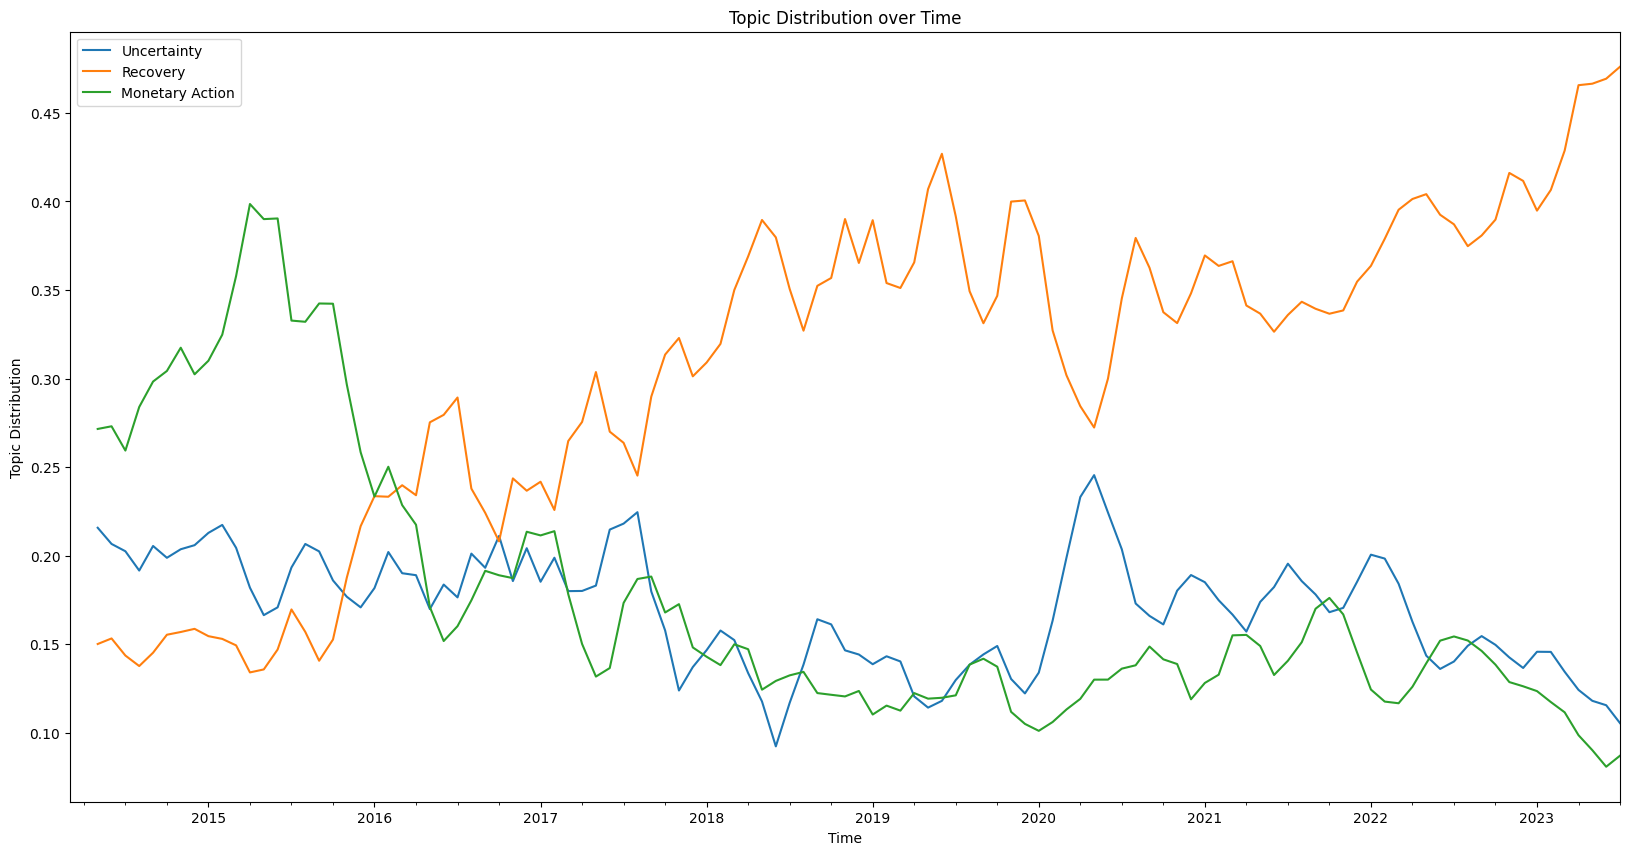

In [22]:
agg = ta.aggregate()
ta.plot(
    agg,
    columns=["Uncertainty", "Recovery", "Monetary Action"],
    plot_type="line",
    title="Topic Distribution over Time",
    xlabel="Time",
    ylabel="Topic Distribution",
)

## Uncertainty Analysis

The uncertainty analysis focuses on the examination of economic activity, specifically targeting instances where the Economic topic weight is greater than 0.5. This threshold represents a significant concentration on economic themes within the documents, and the analysis aims to understand the trends and patterns related to uncertainty within this context.

### Methodology

1. **Data Selection**: The data is filtered to include only those documents where the Economic topic weight is greater than 0.5. This ensures a focus on documents that are highly relevant to economic activity.
2. **Aggregation**: The data is aggregated to provide a consolidated view of the uncertainty trends. The analysis considers data after January 1, 2015, to focus on recent trends.
3. **Plotting**: The uncertainty values are plotted over time, providing a visual representation of how uncertainty has evolved in the context of economic activity.

### Analysis

- **Trends**: The plot of uncertainty reveals specific patterns and fluctuations that correspond to various economic events and conditions. Peaks in the uncertainty graph may align with significant economic events, policy changes, or market volatility.
- **Correlation with Economic Activity**: By focusing on documents with a high Economic topic weight, the analysis provides insights into how uncertainty is manifested within the economic discourse. This can reveal how uncertainty is linked to specific economic indicators, policies, or sectors.
- **Temporal Dynamics**: The time-series analysis allows for the examination of seasonal patterns, cyclical trends, or responses to one-off events. This temporal perspective can help in understanding the underlying drivers of uncertainty within the economic context.

The uncertainty analysis provides a nuanced view of how uncertainty is expressed and evolves within the realm of economic activity. By focusing on documents with a strong economic emphasis, the analysis captures the specific language, themes, and concerns that characterize uncertainty in this domain.

The insights derived from this analysis can be valuable for economists, policymakers, investors, and business leaders who need to understand the nature and implications of uncertainty in the economic landscape. It can inform risk assessment, decision-making, policy formulation, and strategic planning.

Further research could explore correlations with external economic indicators, conduct sentiment analysis to gauge the tone of the discourse, or apply machine learning techniques to predict future uncertainty trends based on historical patterns. By integrating these additional layers of analysis, a more comprehensive and actionable understanding of economic uncertainty can be achieved.


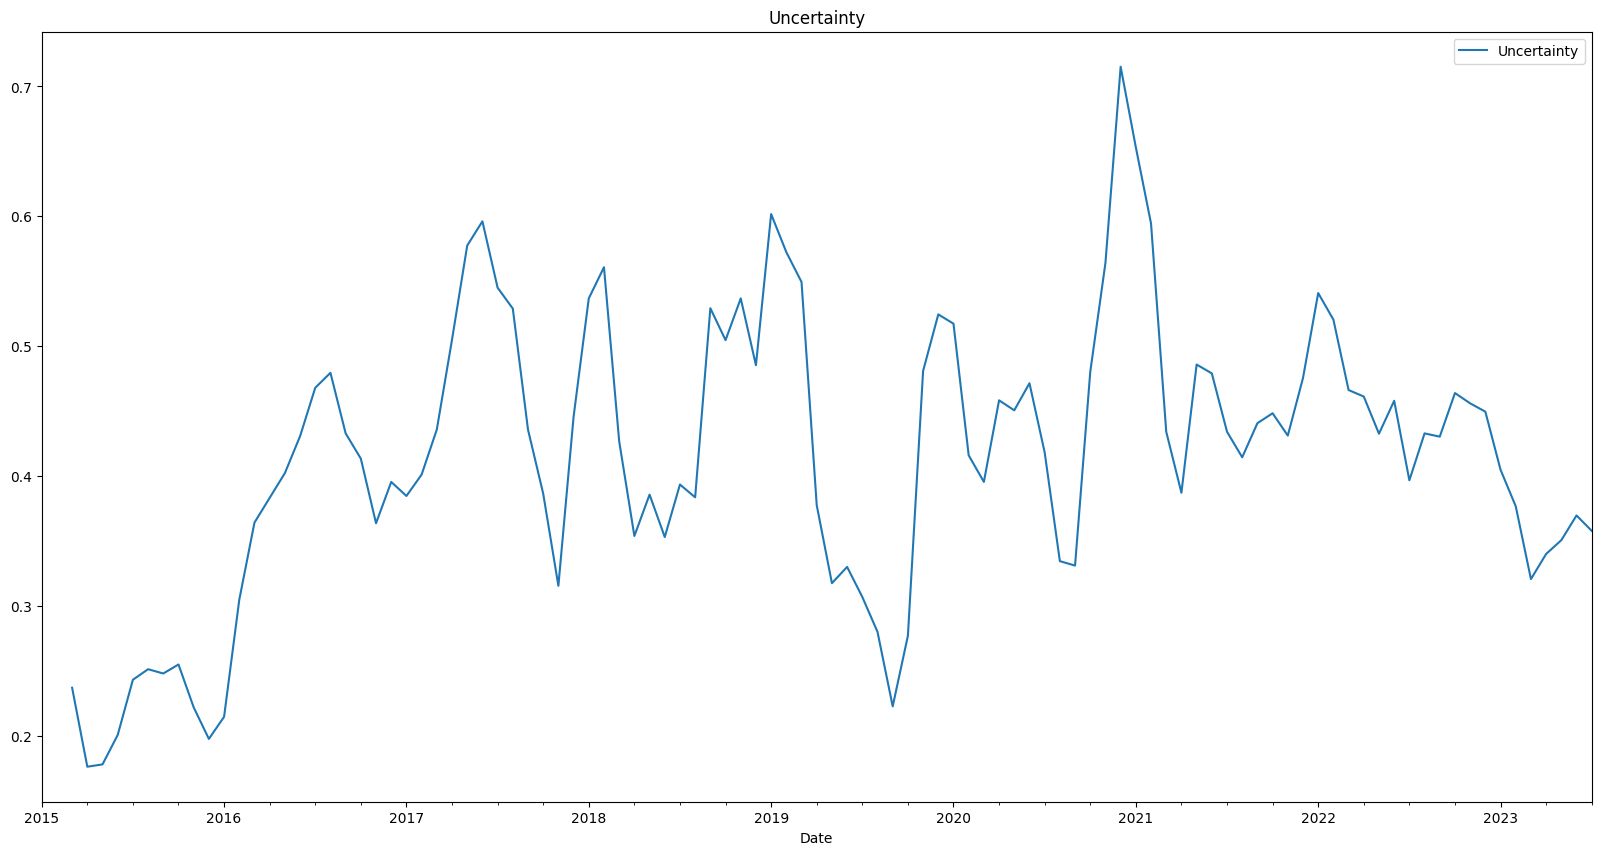

In [23]:
data = ta.data[ta.data["Economic"] > 0.5]
agg = ta.aggregate(data)
agg = agg[agg.index > "2015-01-01"]
ta.plot(agg, columns=["Uncertainty"], title="Uncertainty")

## Article Retrieval for Uncertainty Analysis

The article retrieval process is a vital step in conducting a nuanced and context-specific analysis of uncertainty. By carefully selecting the topic, date range, and number of articles, the analysis ensures that the most relevant and insightful materials are gathered for further examination.

This approach can be adapted and extended for various research objectives, such as tracking the discourse on other topics, conducting longitudinal studies, or integrating with other quantitative measures. It serves as a bridge between quantitative topic modeling and qualitative content analysis, leveraging the strengths of both methodologies to provide a comprehensive understanding of the subject matter.


In [12]:
articles = ta.find_articles(
    topic="Uncertainty", start_date="2021-01-01", end_date="2021-01-31", n=20
)
print(articles.text.values)


['Throughout 2020, almost every sector of Cambodia’s economy was struck hard by the COVID-19 pandemic. Hospitality and construction, two of the Kingdom’s key industry were no exceptions. In an exclusive interview with Khmer Times’ Taing Rinith, Faz Ghotbi, executive chairman at Elite Hospitality & Trading, with more than 20 years of experience in these two sectors, gives his insights on how critical the situation is, as well as his perspective on recovery in the future.\nKT: Can you tell us briefly about yourself and your ventures in Cambodia?\nFaz Ghotbi: My background is mostly in construction and hospitality. I have been working internationally in many countries in the Middle East such as Dubai, United Arab Emirates, and Lebanon. The reason I decided to come to live in Cambodia is because I fell in love with the people because of their friendliness and hospitality. I have been settled down here for almost 20 years and even received\xa0 Cambodian citizenship.\nThroughout the years, I